# Unwind Platform Data Analysis: Data Preparation

This notebook documents the comprehensive process of preparing data collected via Google Forms about the **Unwind** platform. The steps include importing, cleaning, transforming, and preparing the dataset for exploratory analysis.

## About Unwind
Unwind is a digital entertainment platform (in development) that allows users to organize, rate, and share everything they consume—such as movies, series, and games—in one place. The platform features include:
- Personalized shelves with ratings and bookmarks
- Creation of thematic collections
- Social feed with friends' ratings and posts about media
- Intelligent recommendation system (upcoming feature)

## Objectives
- Import survey data
- Clean and validate raw data
- Transform variables for analysis
- Handle outliers and missing values
- Standardize data types
- Export processed dataset

`Note: All charts and analyses will be presented in Portuguese to meet academic requirements.`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_theme(font_scale=1.2)

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings('ignore')

## Data Import

Loading the survey responses from the Google Forms in CSV format.

In [2]:
df = pd.read_csv('../data/raw/unwind_responses.csv')
print(f"Data successfully imported! Shape: {df.shape}")

df.head()

Data successfully imported! Shape: (54, 20)


,Carimbo de data/hora,1) Qual a sua idade?,2) Qual seu sexo?,3) Qual seu estado civil?,4) Qual o seu nível de escolaridade?,5) Onde você mora atualmente?,6) Qual sua ocupação atual?,7) Qual é sua renda mensal aproximada (R$)? (Opcional),8) Qual sistema operacional você usa?,"9) Quantos dias na semana você costuma consumir conteúdos de entretenimento (filmes, séries, jogos)?","10) Em média, quantas horas por semana você assiste filmes?","11) Em média, quantas horas por semana você assiste séries?","12) Em média, quantas horas por semana você joga videogames?",13) Você já usa algum aplicativo para registrar ou compartilhar o que assiste/joga?,"14) Com base na descrição do Unwind, o que você achou da proposta?",15) Você usaria um aplicativo como o Unwind?,16) Você indicaria o Unwind para amigos ou familiares?,"17) Como você se sentiria em relação à inclusão de livros no catálogo do Unwind, junto com filmes, séries e jogos?",18) Quais funcionalidades mais chamaram sua atenção no Unwind?,19) Quais outras funcionalidades você gostaria de ver no Unwind no futuro? (Opcional)
0,2025/04/24 8:56:41 PM GMT-3,21,Masculino,Solteiro(a),Ensino superior,Capital de São Paulo,Estudante,NaN,iOS,2,0,2,4,"Sim, uso frequentemente",Muito interessante,Sim,Sim,Seria ótimo!,Aba pessoal com suas avaliações e likes;Algori...,Voces podiam vender produtos e ingressos dentr...
1,2025/04/25 9:48:03 AM GMT-3,17,Masculino,Solteiro(a),Ensino médio,Capital de São Paulo,Estudante,100000,Android,5,1,1,4,"Sim, uso frequentemente",Muito interessante,Sim,Sim,Seria ótimo!,Algoritmo de recomendação futura;Feed social c...,NaN
2,2025/04/30 9:55:14 AM GMT-3,20,Masculino,Solteiro(a),Ensino superior (incompleto),Região do ABCD,Estudante,NaN,iOS,7,2,3,4,"Sim, mas raramente",Muito interessante,Sim,Sim,"Seria interessante, mas não é algo essencial p...",Algoritmo de recomendação futura;Feed social c...,NaN
3,2025/05/02 5:28:59 PM GMT-3,44,Feminino,Casado(a),Ensino médio (completo),Capital de São Paulo,Autônomo(a),2500,Android,7,10,10,0,Não conheço nenhum,Interessante,Sim,Sim,Seria ótimo!,Aba pessoal com suas avaliações e likes,NaN
4,2025/05/02 5:29:09 PM GMT-3,21,Feminino,Solteiro(a),Ensino superior (incompleto),Capital de São Paulo,Estudante,700,iOS,1,1,1,0,Não tenho interesse,Muito interessante,Não,Sim,Seria ótimo!,Algoritmo de recomendação futura,Funcionalidade de livros seria bem legal


## Data Overview

Understanding the structure, variables and general characteristics of the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 20 columns):
 #   Column                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                              --------------  ----- 
 0   Carimbo de data/hora                                                                                                54 non-null     object
 1   1) Qual a sua idade?                                                                                                54 non-null     int64 
 2   2) Qual seu sexo?                                                                                                   54 non-null     object
 3   3) Qual seu estado civil?                                                                                           54 non-null     object
 4   4) Qual o seu nível de escol

In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Carimbo de data/hora,54,53,2025/05/09 12:56:13 PM GMT-3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1) Qual a sua idade?,54.0,NaN,NaN,NaN,27.12963,14.142197,16.0,20.0,21.0,23.75,63.0
2) Qual seu sexo?,54,3,Masculino,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3) Qual seu estado civil?,54,3,Solteiro(a),42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4) Qual o seu nível de escolaridade?,54,8,Ensino superior (incompleto),34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5) Onde você mora atualmente?,54,4,Capital de São Paulo,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6) Qual sua ocupação atual?,54,6,Estudante,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7) Qual é sua renda mensal aproximada (R$)? (Opcional),21,19,2500,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8) Qual sistema operacional você usa?,54,2,iOS,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"9) Quantos dias na semana você costuma consumir conteúdos de entretenimento (filmes, séries, jogos)?",54.0,NaN,NaN,NaN,5.203704,2.350268,1.0,3.0,7.0,7.0,7.0


## Column Renaming

Creating a dictionary to map the original column names to more standardized ones.

In [5]:
new_column_names = {
    'Carimbo de data/hora': 'timestamp',
    '1) Qual a sua idade?': 'idade',
    '2) Qual seu sexo?': 'sexo',
    '3) Qual seu estado civil?': 'estado_civil',
    '4) Qual o seu nível de escolaridade?': 'escolaridade',
    '5) Onde você mora atualmente?': 'regiao',
    '6) Qual sua ocupação atual?': 'ocupacao',
    '7) Qual é sua renda mensal aproximada (R$)? (Opcional)': 'renda',
    '8) Qual sistema operacional você usa?': 'sistema_operacional',
    '9) Quantos dias na semana você costuma consumir conteúdos de entretenimento (filmes, séries, jogos)?': 'dias_entretenimento',
    '10) Em média, quantas horas por semana você assiste filmes?': 'horas_filmes',
    '11) Em média, quantas horas por semana você assiste séries?': 'horas_series',
    '12) Em média, quantas horas por semana você joga videogames?': 'horas_jogos',
    '13) Você já usa algum aplicativo para registrar ou compartilhar o que assiste/joga?': 'uso_app_similar',
    '14) Com base na descrição do Unwind, o que você achou da proposta?': 'opiniao_proposta',
    '15) Você usaria um aplicativo como o Unwind?': 'usaria_app',
    '16) Você indicaria o Unwind para amigos ou familiares?': 'indicaria_app',
    '17) Como você se sentiria em relação à inclusão de livros no catálogo do Unwind, junto com filmes, séries e jogos?': 'inclusao_livros',
    '18) Quais funcionalidades mais chamaram sua atenção no Unwind?': 'funcionalidades',
    '19) Quais outras funcionalidades você gostaria de ver no Unwind no futuro? (Opcional)': 'sugestoes'
}

df = df.rename(columns=new_column_names)
print("Columns renamed successfully.")

df.columns

Columns renamed successfully.


Index(['timestamp', 'idade', 'sexo', 'estado_civil', 'escolaridade', 'regiao', 'ocupacao', 'renda', 'sistema_operacional', 'dias_entretenimento', 'horas_filmes', 'horas_series', 'horas_jogos', 'uso_app_similar', 'opiniao_proposta', 'usaria_app', 'indicaria_app', 'inclusao_livros', 'funcionalidades', 'sugestoes'], dtype='object')

## Missing Values Analysis

Identifying missing data and determining appropriate treatment strategies.

In [6]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df) * 100).round(2)

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

missing_data[missing_data['Missing Values'] > 0].sort_values('Missing Values', ascending=False)

,Missing Values,Percentage (%)
sugestoes,41,75.93
renda,33,61.11


### Handling Missing Values

Based on the missing data analysis, we'll exclude two columns with substantial missing data:

- `sugestoes` (75.93% missing): With only 13 responses out of 54, we have too few data points for meaningful quantitative analysis. Any insights from these open-ended responses will be addressed qualitatively.

- `renda` (61.11% missing): With only 21 responses out of 54, the sample size is too limited to draw statistically sound conclusions about income relationships. This prevents potential biases from a non-representative income sample.

This approach maintains data integrity and focuses our analysis on more complete variables.


###  Removal of Unnecessary Variable

- `timestamp` variable is not needed for our analysis and will be removed.
    - Our analysis focuses on respondents' characteristics and opinions about the Unwind platform, not on temporal response patterns.

In [7]:
df_clean = df.copy()
df_clean = df_clean.drop(columns=['sugestoes', 'renda', 'timestamp'])

print(f"Original dataset shape: {df.shape}")
print(f"Clean dataset shape: {df_clean.shape}")

Original dataset shape: (54, 20)
Clean dataset shape: (54, 17)


## Examining Outliers in Numerical Variables

Identifying extreme values across all relevant numerical variables to ensure data quality and inform appropriate treatment strategies.

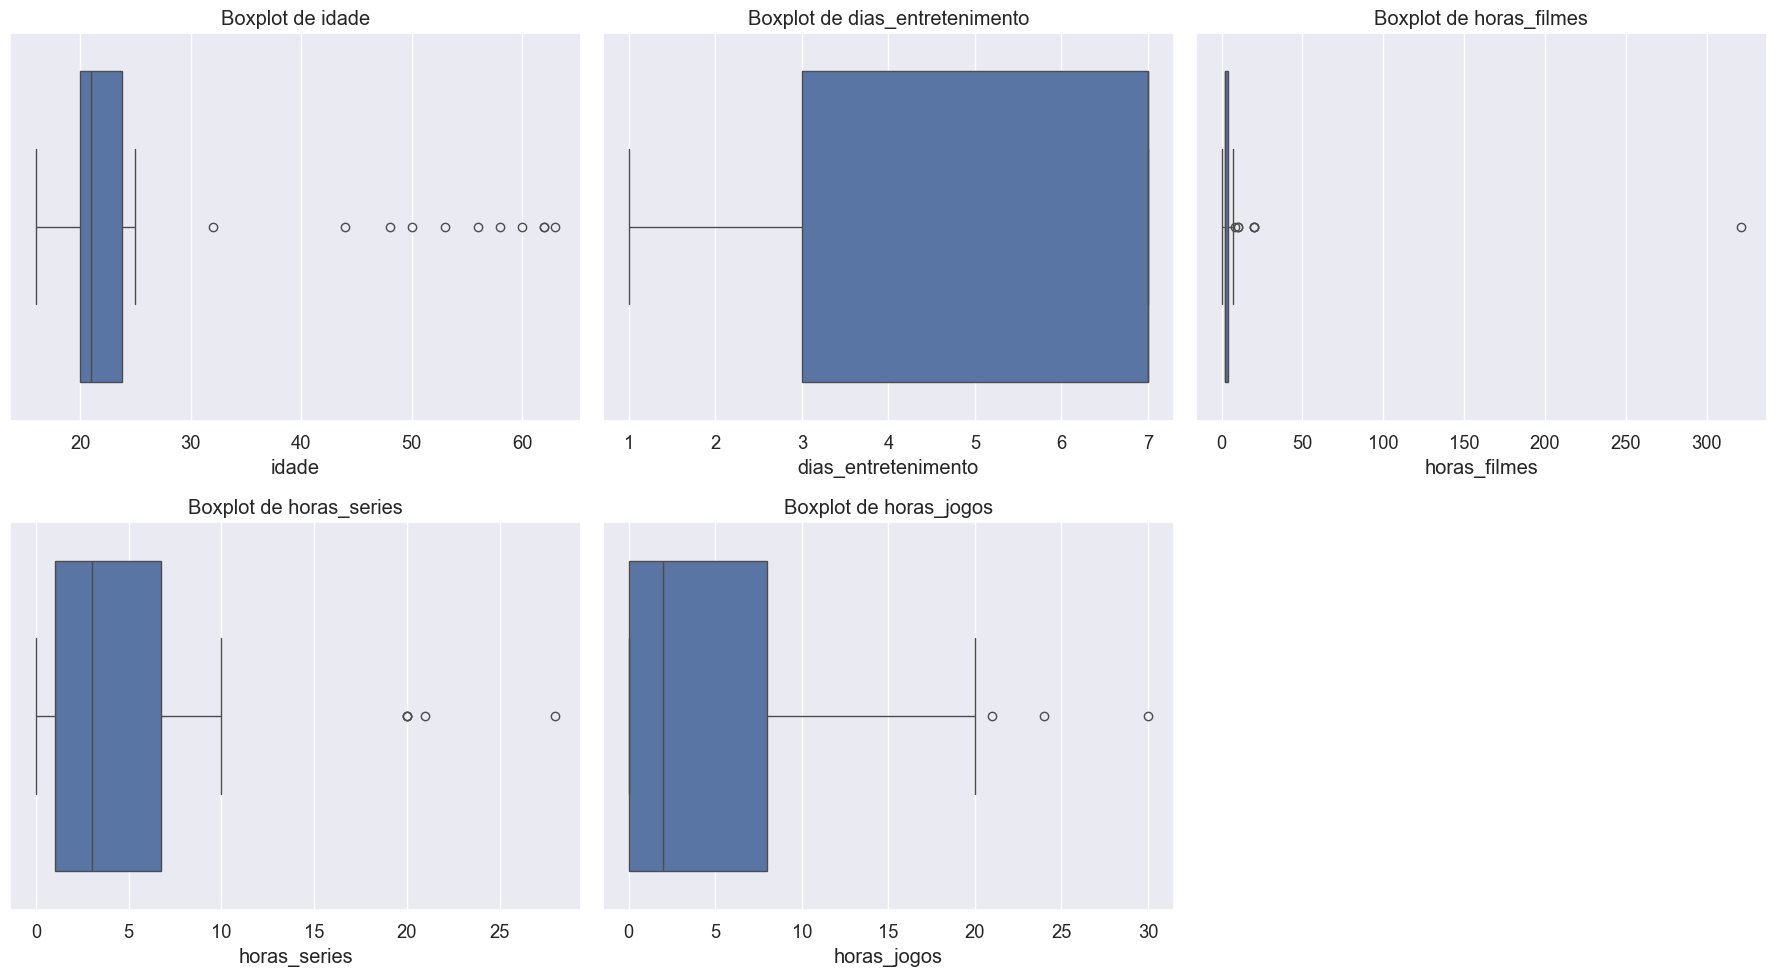

Statistical summary of numerical variables:
           idade  dias_entretenimento  horas_filmes  horas_series  horas_jogos
count  54.000000            54.000000     54.000000     54.000000    54.000000
mean   27.129630             5.203704      9.722222      5.203704     5.500000
std    14.142197             2.350268     43.395686      6.171693     7.725845
min    16.000000             1.000000      0.000000      0.000000     0.000000
25%    20.000000             3.000000      2.000000      1.000000     0.000000
50%    21.000000             7.000000      2.000000      3.000000     2.000000
75%    23.750000             7.000000      4.000000      6.750000     8.000000
max    63.000000             7.000000    321.000000     28.000000    30.000000

Potential outliers (values beyond 1.5 IQR):

Outliers in idade:
Number of outliers: 11
Range: 14.375 to 29.375
Outlier values: [np.int64(32), np.int64(44), np.int64(48), np.int64(50), np.int64(53), np.int64(56), np.int64(58), np.int64(60), np.i

In [8]:
numerical_cols = ['idade', 'dias_entretenimento', 'horas_filmes', 'horas_series', 'horas_jogos']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        sns.boxplot(x=df_clean[col], ax=axes[i])
        axes[i].set_title(f'Boxplot de {col}')
        axes[i].set_xlabel(col)

# Hide unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.savefig('../images/boxplots.png', dpi=300)
plt.show()

print("Statistical summary of numerical variables:")
print(df_clean[numerical_cols].describe())

print("\nPotential outliers (values beyond 1.5 IQR):")
for col in numerical_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    if not outliers.empty:
        print(f"\nOutliers in {col}:")
        print(f"Number of outliers: {len(outliers)}")
        print(f"Range: {lower_bound} to {upper_bound}")
        print(f"Outlier values: {sorted(outliers[col].unique())}")

### Outliers Analysis and Treatment

Based on the boxplots and statistical analysis, we've identified several outliers that require careful consideration:

#### 1. Age (`idade`)
- 11 outliers identified (ages 32-63)
- These represent older respondents in our sample
- **Decision:** Keep these values as they likely represent valid demographic diversity rather than errors

#### 2. Entertainment Hours
- **Films (`horas_filmes`)**: Extreme outlier at 321 hours/week (physically impossible as a week has only 168 hours)
- **Series (`horas_series`)**: Outliers at 20, 21, and 28 hours/week
- **Games (`horas_jogos`)**: Outliers at 21, 24, and 30 hours/week

For the physically impossible value in `horas_filmes`, we'll replace it with the mean value rounded up to maintain integer responses:

In [9]:
extreme_idx = df_clean['horas_filmes'].idxmax()
print("Details of respondent with extreme film hours:")
print(df_clean.loc[extreme_idx, ['idade', 'sexo', 'dias_entretenimento', 'horas_filmes', 'horas_series', 'horas_jogos']])

df_analysis = df_clean.copy()

mask_impossible = df_analysis['horas_filmes'] > 168
print(f"Number of impossible values in horas_filmes: {sum(mask_impossible)}")

mean_horas_filmes = df_clean.loc[~mask_impossible, 'horas_filmes'].mean()
mean_rounded_up = np.ceil(mean_horas_filmes)
print(f"Mean value for horas_filmes (excluding outlier): {mean_horas_filmes:.2f}")
print(f"Rounded up mean (for integer consistency): {mean_rounded_up:.0f}")

df_analysis.loc[mask_impossible, 'horas_filmes'] = mean_rounded_up

print("\nAfter treatment:")
print(f"Max value in horas_filmes: {df_analysis['horas_filmes'].max()}")

Details of respondent with extreme film hours:
idade                        53
sexo                   Feminino
dias_entretenimento           7
horas_filmes                321
horas_series                 21
horas_jogos                   0
Name: 43, dtype: object
Number of impossible values in horas_filmes: 1
Mean value for horas_filmes (excluding outlier): 3.85
Rounded up mean (for integer consistency): 4

After treatment:
Max value in horas_filmes: 20


## Data Type Standardization

### Categorical Variables Encoding

Converting categorical variables to appropriate category data types for more efficient memory usage and better analysis capabilities.

In [10]:
categorical_columns = [
    'sexo', 'estado_civil', 'escolaridade', 'regiao', 'ocupacao', 
    'sistema_operacional', 'uso_app_similar', 'opiniao_proposta',
    'usaria_app', 'indicaria_app', 'inclusao_livros', 'funcionalidades'
]

for col in categorical_columns:
    df_analysis[col] = df_analysis[col].astype('category')

print(df_analysis.dtypes)

idade                     int64
sexo                   category
estado_civil           category
escolaridade           category
regiao                 category
ocupacao               category
sistema_operacional    category
dias_entretenimento       int64
horas_filmes              int64
horas_series              int64
horas_jogos               int64
uso_app_similar        category
opiniao_proposta       category
usaria_app             category
indicaria_app          category
inclusao_livros        category
funcionalidades        category
dtype: object


## Final Data Preparation and Export

Preparing the final dataset for exploratory analysis and exporting it to the processed data directory.

In [11]:
print("Final dataset shape:", df_analysis.shape)
print("Columns with missing values:")
print(df_analysis.isnull().sum()[df_analysis.isnull().sum() > 0])

df_analysis.to_csv('../data/processed/clean_unwind_responses.csv', index=False)
print("Clean dataset exported successfully to '../data/processed/clean_unwind_responses.csv'")

df.drop(columns=['sugestoes', 'renda']).to_csv('../data/processed/original_unwind_responses.csv', index=False)
print("Original dataset (without sparse columns) exported to '../data/processed/original_unwind_responses.csv'")

Final dataset shape: (54, 17)
Columns with missing values:
Series([], dtype: int64)
Clean dataset exported successfully to '../data/processed/clean_unwind_responses.csv'
Original dataset (without sparse columns) exported to '../data/processed/original_unwind_responses.csv'
